In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

sns.set(style="darkgrid")

import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('cyber.csv')

In [3]:
df.head()

,state,industry,n_employees,incident_year,attribute,compromise,confidence,data_disclosure,action,action_variety,action_vector,discovery_variety,asset_group,asset_variety,availability_duration,discovery,containment,exfiltration,time_compromise,actor
0,GA,education,4.0,2017,confidentiality,alter behavior,3.0,yes,social,phishing,email,law enforcement,server,mail,0.0,6.0,-999.0,-999.0,-999.0,0
1,PA,healthcare,4.0,2018,confidentiality,data loss,1.0,yes,misuse,knowledge abuse,physical access,other,server,database,0.0,4.0,-999.0,0.0,2.0,0
2,NE,finance and insurance,6.0,2017,confidentiality,data loss,2.0,yes,physical,skimmer,victim public area,customer,terminal,atm,0.0,-999.0,-999.0,-999.0,-999.0,0
3,OH,government,3.0,2015,confidentiality,data loss,2.0,yes,error,other,other,customer,media,disk media,0.0,-999.0,-999.0,-999.0,-999.0,0
4,Other,retail trade,1.0,2017,integrity,hardware tampering,3.0,yes,physical,skimmer,victim public area,customer,terminal,gas terminal,0.0,2.0,-999.0,-999.0,2.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1806 entries, 0 to 1805
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  1806 non-null   object 
 1   industry               1806 non-null   object 
 2   n_employees            1806 non-null   float64
 3   incident_year          1806 non-null   int64  
 4   attribute              1806 non-null   object 
 5   compromise             1806 non-null   object 
 6   confidence             1806 non-null   float64
 7   data_disclosure        1806 non-null   object 
 8   action                 1806 non-null   object 
 9   action_variety         1806 non-null   object 
 10  action_vector          1806 non-null   object 
 11  discovery_variety      1806 non-null   object 
 12  asset_group            1806 non-null   object 
 13  asset_variety          1806 non-null   object 
 14  availability_duration  1806 non-null   float64
 15  disc

In [5]:
df_new=df.drop(columns=['state','incident_year','action'])

In [8]:
df_new=pd.get_dummies(df_new)

In [7]:
X=df_new.drop(columns='actor')
y=df_new.actor

In [11]:
from sklearn.model_selection import train_test_split


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [706]:
from sklearn.metrics import f1_score, roc_curve, roc_auc_score,accuracy_score,precision_score,classification_report, confusion_matrix

In [707]:
from sklearn.ensemble import RandomForestClassifier

In [708]:
rf=RandomForestClassifier()

In [709]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [710]:
predictions=rf.predict(X_test)

In [711]:
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predictions))
conf_mat = confusion_matrix(y_test, predictions)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       352
           1       1.00      0.30      0.46        10

    accuracy                           0.98       362
   macro avg       0.99      0.65      0.73       362
weighted avg       0.98      0.98      0.98       362

Confusion matrix:
 [[352   0]
 [  7   3]]


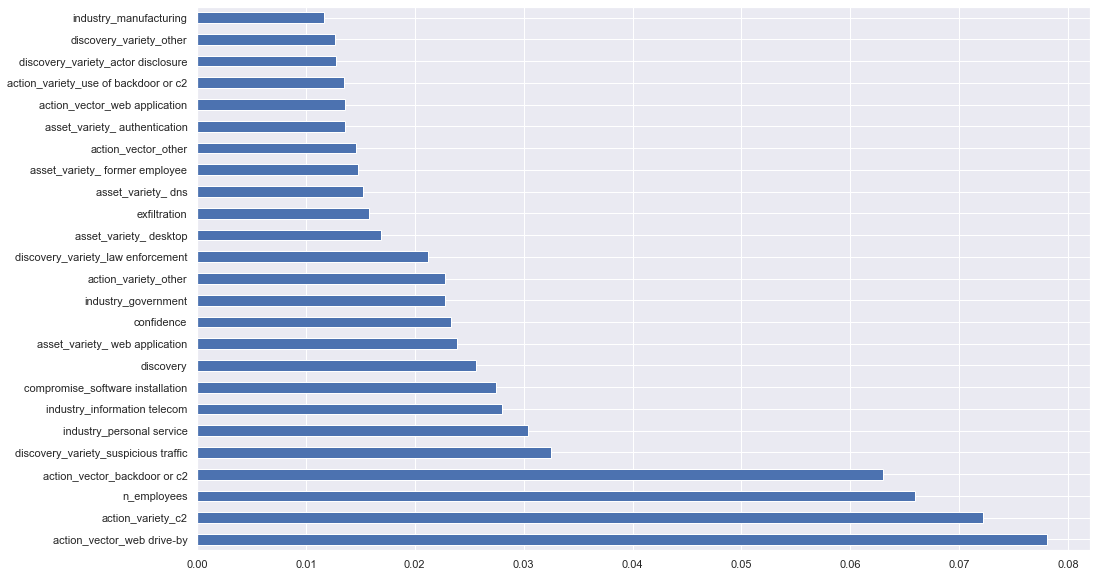

In [712]:
plt.figure(figsize=(16, 10))
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(25).plot(kind='barh')

## Random Under Sampling

In [713]:
from imblearn.under_sampling import RandomUnderSampler

In [714]:
rus=RandomUnderSampler(random_state=0)

In [715]:
X_rus, y_rus=rus.fit_sample(X_train,y_train)

In [716]:
y_ru=pd.DataFrame(y_rus)

In [717]:
y_ru.actor.value_counts()

1    41
0    41
Name: actor, dtype: int64

In [718]:
from sklearn.ensemble import RandomForestClassifier

In [719]:
rf=RandomForestClassifier(random_state=51,max_depth=16, n_estimators=400, max_features='log2')

In [720]:
rf.fit(X_rus, y_rus)

RandomForestClassifier(max_depth=16, max_features='log2', n_estimators=400,
                       random_state=51)

In [721]:
prediction=rf.predict(X_test)

In [722]:
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, prediction))
conf_mat = confusion_matrix(y_test, prediction)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       0.99      0.83      0.90       352
           1       0.10      0.70      0.18        10

    accuracy                           0.82       362
   macro avg       0.55      0.76      0.54       362
weighted avg       0.97      0.82      0.88       362

Confusion matrix:
 [[291  61]
 [  3   7]]


## Random Over Sampling

In [723]:
from imblearn.over_sampling import RandomOverSampler

In [724]:
ros=RandomOverSampler(random_state=0)

In [725]:
X_ros, y_ros=ros.fit_sample(X_train,y_train)

In [726]:
y_ro=pd.DataFrame(y_ros)

In [727]:
y_ro.actor.value_counts()

1    1403
0    1403
Name: actor, dtype: int64

In [728]:
rf=RandomForestClassifier(random_state=51,max_depth=18, n_estimators=400,n_jobs=-1, max_features='auto')

In [729]:
rf.fit(X_ros, y_ros)

RandomForestClassifier(max_depth=18, n_estimators=400, n_jobs=-1,
                       random_state=51)

In [730]:
prediction=rf.predict(X_test)

In [731]:
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, prediction))
conf_mat = confusion_matrix(y_test, prediction)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       352
           1       1.00      0.50      0.67        10

    accuracy                           0.99       362
   macro avg       0.99      0.75      0.83       362
weighted avg       0.99      0.99      0.98       362

Confusion matrix:
 [[352   0]
 [  5   5]]


## SMOTE

In [732]:
from imblearn.over_sampling import SMOTE

In [733]:
smote=SMOTE(random_state=51)

In [734]:
X_smote, y_smote=smote.fit_resample(X_train,y_train)

In [735]:
y_sm=pd.DataFrame(y_smote)

In [736]:
y_sm.actor.value_counts()

1    1403
0    1403
Name: actor, dtype: int64

In [737]:
rf=RandomForestClassifier(random_state=51,max_depth=16, n_estimators=400,n_jobs=-1, max_features='auto')

In [738]:
rf.fit(X_smote, y_smote)

RandomForestClassifier(max_depth=16, n_estimators=400, n_jobs=-1,
                       random_state=51)

In [739]:
prediction=rf.predict(X_test)

In [740]:
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, prediction))
conf_mat = confusion_matrix(y_test, prediction)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       352
           1       0.57      0.40      0.47        10

    accuracy                           0.98       362
   macro avg       0.78      0.70      0.73       362
weighted avg       0.97      0.98      0.97       362

Confusion matrix:
 [[349   3]
 [  6   4]]


## ADASYN

In [781]:
from imblearn.over_sampling import ADASYN

In [782]:
ada=ADASYN(random_state=0, n_neighbors=8)

In [783]:
X_ada, y_ada=ada.fit_sample(X_train, y_train)

In [784]:
rf=RandomForestClassifier(random_state=51,max_depth=19, n_estimators=500,n_jobs=-1, max_features='auto')

In [785]:
rf.fit(X_ada, y_ada)

RandomForestClassifier(max_depth=19, n_estimators=500, n_jobs=-1,
                       random_state=51)

In [786]:
prediction=rf.predict(X_test)

In [788]:
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, prediction))
conf_mat = confusion_matrix(y_test, prediction)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       352
           1       0.80      0.40      0.53        10

    accuracy                           0.98       362
   macro avg       0.89      0.70      0.76       362
weighted avg       0.98      0.98      0.98       362

Confusion matrix:
 [[351   1]
 [  6   4]]


## GridSearchCV

In [789]:
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_curve, roc_auc_score



In [790]:
param_grid={'max_depth':[14,16,18],
            'bootstrap': [True],
            
            'max_features':['log2', 'auto'],
            
            'n_estimators':[400],
            'random_state':[51],
            
           }




rf=RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1)

In [791]:
grid_search.fit(X_ros, y_ros)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [14, 16, 18],
                         'max_features': ['log2', 'auto'],
                         'n_estimators': [400], 'random_state': [51]})

In [792]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 18,
 'max_features': 'auto',
 'n_estimators': 400,
 'random_state': 51}

In [793]:
final_model=grid_search.best_estimator_

In [794]:
prediction=final_model.predict(X_test)

In [796]:
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, prediction))
conf_mat = confusion_matrix(y_test, prediction)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       352
           1       1.00      0.50      0.67        10

    accuracy                           0.99       362
   macro avg       0.99      0.75      0.83       362
weighted avg       0.99      0.99      0.98       362

Confusion matrix:
 [[352   0]
 [  5   5]]


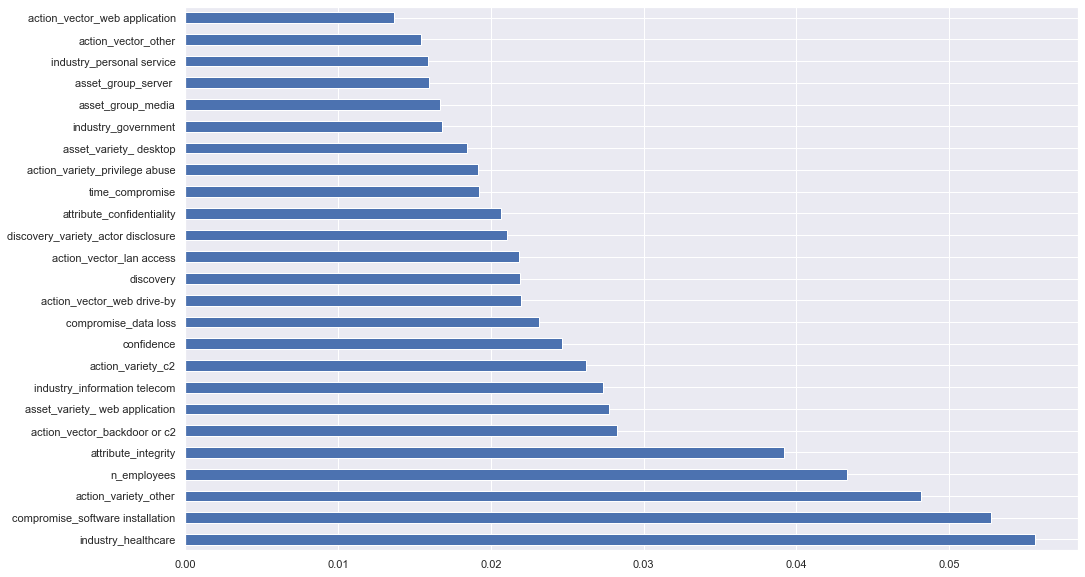

In [801]:
plt.figure(figsize=(16, 10))
feat_importances = pd.Series(final_model.feature_importances_, index=X_ros.columns)
feat_importances.nlargest(25).plot(kind='barh')

In [755]:
prob=final_model.predict_proba(X_test)[:,1]

In [756]:
proball=final_model.predict_proba(X)

probal=pd.DataFrame(proball)
probal.head()

,0,1
0,0.978252,0.021748
1,1.000000,0.000000
2,0.992753,0.007247
3,0.966258,0.033742
4,1.000000,0.000000


In [757]:
probs=pd.DataFrame(prob)
probs

,0
0,0.008537
1,0.003967
2,0.005933
3,0.002048
4,0.041759
...,...
357,0.000000
358,0.015306
359,0.343274
360,0.002883


In [758]:
fpr, tpr, thresholds  = roc_curve(y_test, prob) #Get the ROC Curve
roc_auc_score(y_test, prob)

0.9460227272727273

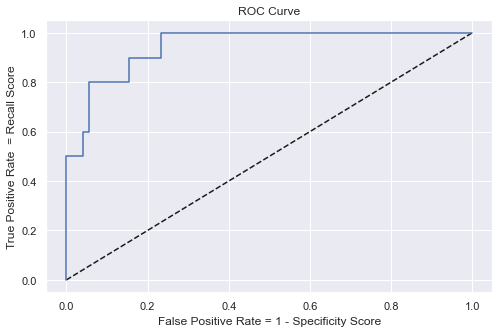

In [759]:
plt.figure(figsize=(8,5))
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate = 1 - Specificity Score')
plt.ylabel('True Positive Rate  = Recall Score')
plt.title('ROC Curve')
plt.show()

In [780]:
fpr,tpr,threshold=precision_recall_curve(y_test, prob)

In [761]:
def adjusted_classes(prob, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in prob]

def precision_recall_threshold(fpr, tpr, thresholds, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(prob, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    # plot the curve
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve ^ = current threshold")
    plt.step(tpr, fpr, color='b', alpha=0.2,
             where='post')
    plt.fill_between(tpr, fpr, step='post', alpha=0.2,
                     color='b')
    plt.ylim([0.05, 1.01]);
    plt.xlim([0.05, 1.01]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(tpr[close_default_clf], fpr[close_default_clf], '^', c='k',
            markersize=15)

     pred_neg  pred_pos
neg       352         0
pos         5         5


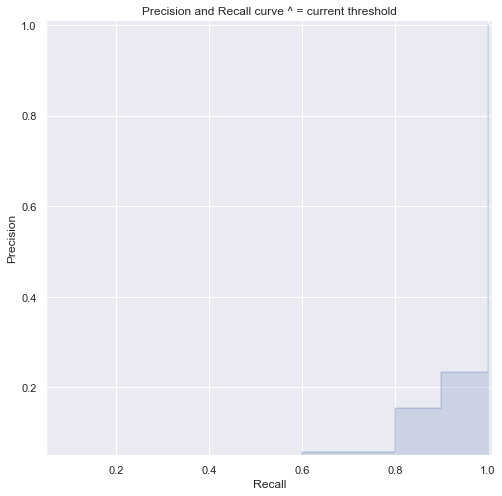

In [779]:
precision_recall_threshold(fpr, tpr, thresholds, t=0.488)

In [763]:
def plot_roc_curve(fpr, tpr, label=None):
    """
    The ROC curve, modified from 
    Hands-On Machine learning with Scikit-Learn and TensorFlow; p.91
    """
    plt.figure(figsize=(10,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.yticks(np.arange(0,1.1, 0.1))
    plt.xticks(np.arange(0,1.05, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')

0.9460227272727273


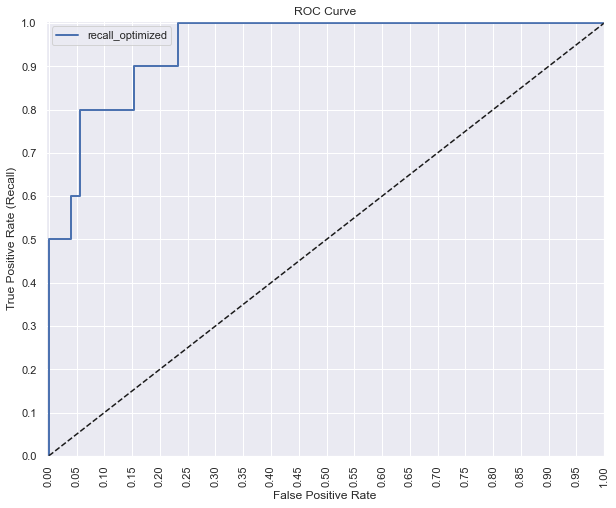

In [764]:
fpr, tpr, auc_thresholds = roc_curve(y_test, prob)
print(auc(fpr, tpr)) # AUC of ROC
plot_roc_curve(fpr, tpr, 'recall_optimized')

## Determine optimal threshold

In [769]:
#calculate geometric mean 
from numpy import arange
from numpy import argmax


In [770]:
def to_label(prob, threshold):
    return (prob >= threshold).astype('int')

In [771]:
threshold=arange(0,1,0.001)

In [772]:
#locate the index of the largest g-mean

scores=[f1_score(y_test, to_label(prob,t)) for t in threshold]

In [773]:
ix=argmax(scores)

In [774]:
print('Threshold=%.3f, F-Score=%.5f' % (threshold[ix], scores[ix]))

Threshold=0.488, F-Score=0.66667
